<a href="https://colab.research.google.com/github/saitejajonnada/Fundamental/blob/main/Big_Sales_Prediction_using_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Sales Prediction using random Forest Regression**

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

# **Import Dataset**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


# **Get Information of data Frame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [ ]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


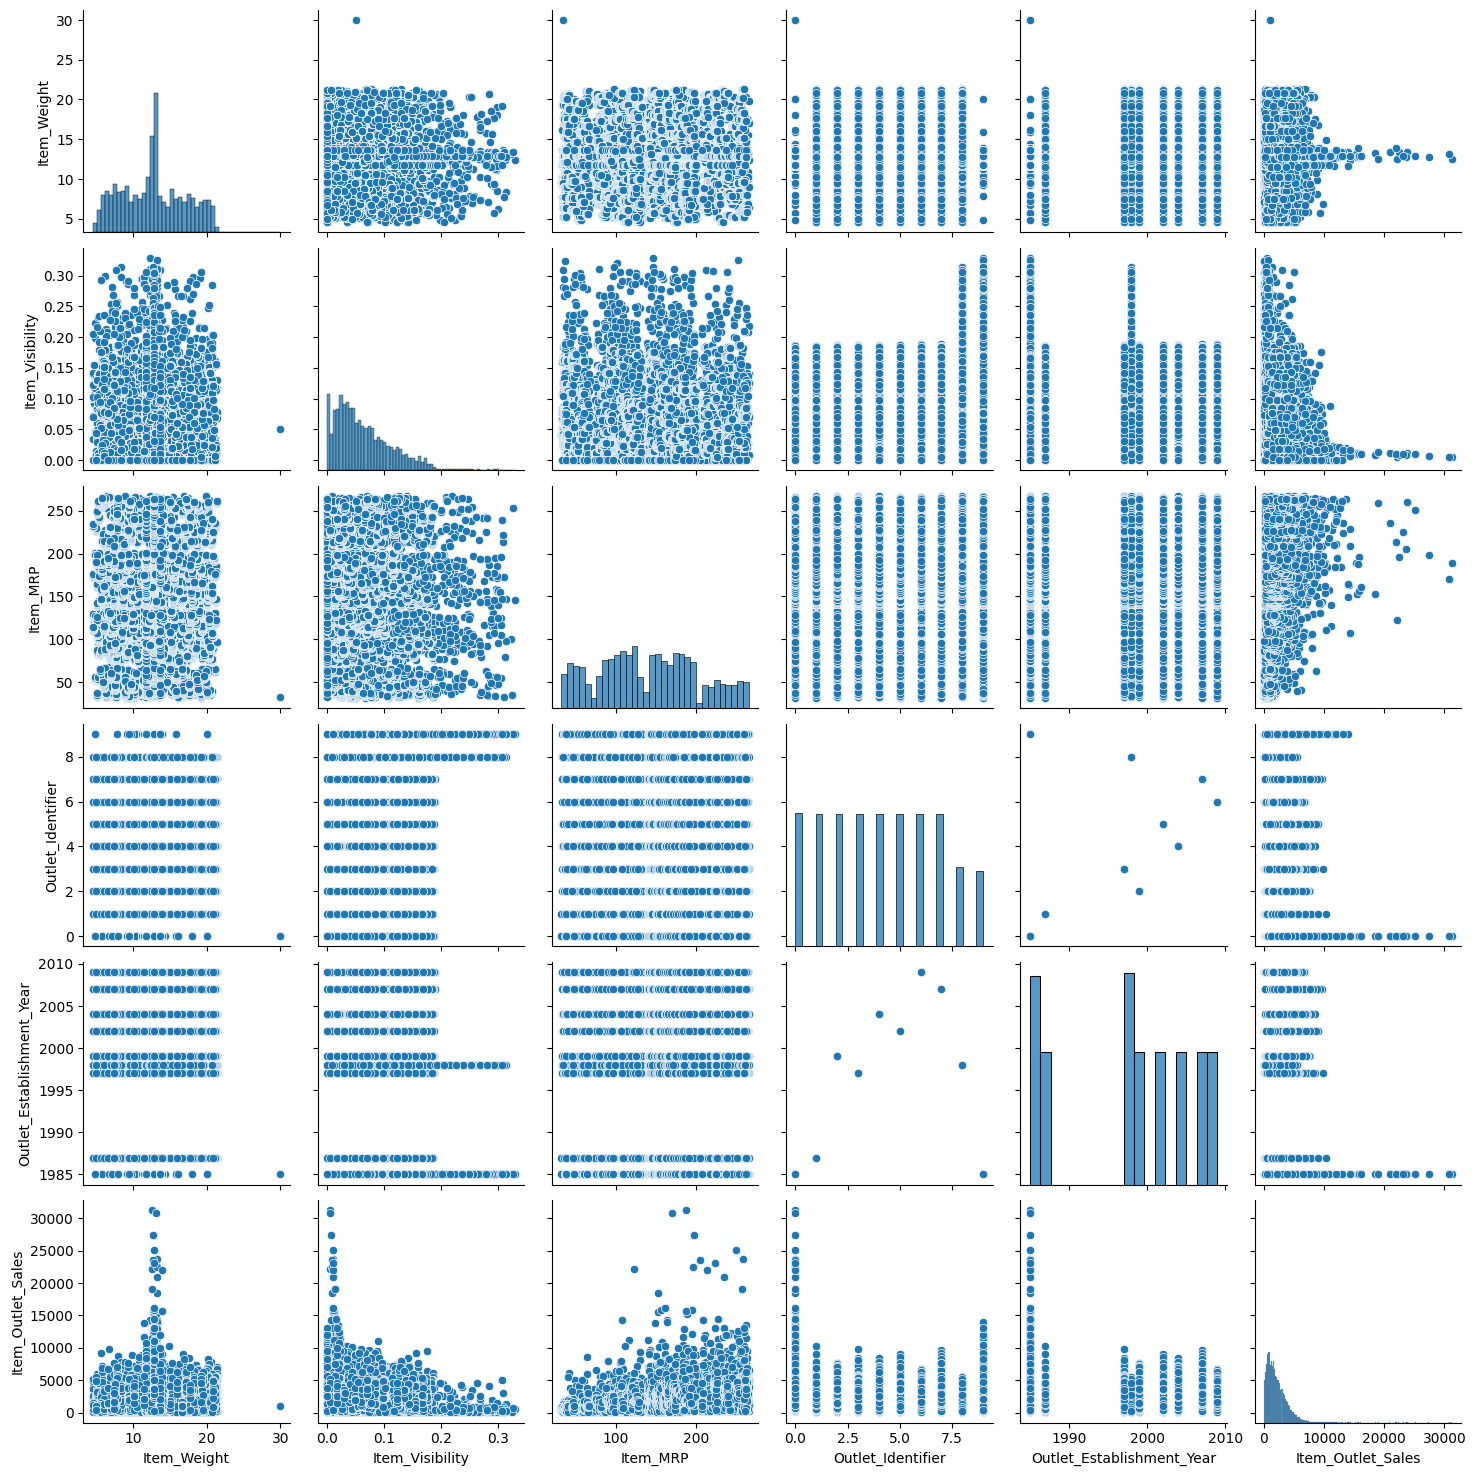

In [ ]:
import seaborn as sns
sns.pairplot(df)

# **Get categories and Counts of Categorical Variables**

In [ ]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [ ]:
df.replace({'Item_Fast_Content': {'LF':'low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [ ]:
df.replace({'Item_fast_Content': {'low Fat': 0,'Regular' :1}},inplace=True)

In [ ]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
dtype: int64

In [ ]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household' :1,
                         'Froze Foods' : 0, 'Dairy' : 0, 'Baking Goods':0,
                         'Canned' :0, 'Health and Hygiene' :1,
                         'Meat': 0, 'Soft Drinks' :0, 'Breads' :0, 'Hard Drinks' : 0,
                         'Others' : 2, 'Starchy Foods' : 0, 'Breakfast' : 0, 'Seafood' : 0
                          }},inplace=True)

In [ ]:
df[['Item_Type']].value_counts()

Item_Type   
0               10092
1                2406
Frozen Foods     1426
2                 280
dtype: int64

In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
dtype: int64

In [ ]:
df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT049':2,
                                 'OUT046':3,'OUT035':4,'OUT045':5,
                                 'OUT018':6,'OUT017':7,'OUT010':8,'OUT019':9,
                                 }},inplace=True)

In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
dtype: int64

In [ ]:
df.replace({'Outlet_size': {'Small':0,'Medium' :1 ,'High':2}},inplace=True)

In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
dtype: int64

In [ ]:
df.replace({'Outlet_Location_Type':{'Tier 1':0 , 'Tier 1':1,'Tier 3' : 2}},inplace=True)

In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
Tier 2                  4641
1                       3980
dtype: int64

In [ ]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
dtype: int64

In [ ]:
df.replace({'Outlet_Type':{'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermrarket Type3':3}},inplace=True)

In [ ]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
1                    9294
0                    1805
Supermarket Type3    1559
2                    1546
dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,0,33.4874,2,1999,Medium,1,1,436.608721
1,FDT36,12.3,Low Fat,0.111904,0,33.9874,7,2007,Medium,Tier 2,1,443.127721
2,FDT36,12.3,LF,0.111728,0,33.9874,6,2009,Medium,2,2,564.598400
3,FDT36,12.3,Low Fat,0.000000,0,34.3874,9,1985,Small,1,0,1719.370000
4,FDP12,9.8,Regular,0.045523,0,35.0874,7,2007,Medium,Tier 2,1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.3+ MB


# **Get Shape of dataFrame**

In [ ]:
df.shape

(14204, 12)

# **Define y (dependent or label or traget variable) and X (independent or feature or arrtibute Variable)**

In [ ]:
y = df['Item_Outlet_Sales']

In [ ]:
y.shape

(14204,)

In [ ]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [ ]:
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier',
        'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,Low Fat,0.111448,0,33.4874,2,1999,Medium,1,1
1,12.300000,Low Fat,0.111904,0,33.9874,7,2007,Medium,Tier 2,1
2,12.300000,LF,0.111728,0,33.9874,6,2009,Medium,2,2
3,12.300000,Low Fat,0.000000,0,34.3874,9,1985,Small,1,0
4,9.800000,Regular,0.045523,0,35.0874,7,2007,Medium,Tier 2,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,Low Fat,0.069606,0,261.9252,4,2004,Small,Tier 2,1
14200,12.800000,Low Fat,0.070013,0,262.8252,7,2007,Medium,Tier 2,1
14201,12.800000,Low Fat,0.069561,0,263.0252,1,1987,High,2,1
14202,13.659758,Low Fat,0.069282,0,263.5252,0,1985,Medium,2,Supermarket Type3


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(Xm,y, test_size = 0.1, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

# **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RamdomForestRegressor(random_state=2529)

In [ ]:
rfr.fit(X_train, y_train)

ValueError: ignored

# **Model Evalution**

# **Prediction**

# **explaination**